# <b> <p align="center"> <span style="color:	mediumspringgreen "> PyTorch Computer Vision <span> </p> </b>

## 0. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. | 
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. | 
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  | 
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.



In [1]:
# Import PyTorch

import torch
from torch import nn 

# import trochvision

import torchvision 

from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualaization

import matplotlib.pyplot as plt

# Check version

print(torch.__version__)
print(torchvision.__version__)

1.8.1+cu101
0.9.1+cu101


## 1. Getting a dataset

The dataset will'be using is FashionMNIST : https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST


In [2]:
# Setup traning data 

from torchvision import datasets

train_data = datasets.FashionMNIST(

    root='data', # where to download data to ?
    train=True, # do we want the training dataset ?
    download=True,
    transform=ToTensor(),
    target_transform=None


)

test_data = datasets.FashionMNIST(

    root='data', # where to download data to ?
    train=False, # do we want the training dataset ?
    download=True,
    transform=ToTensor(),
    target_transform=None

)

In [3]:
image,label=train_data[0]

image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image.shape

torch.Size([1, 28, 28])

In [5]:
class_name=train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## 1.1 Check input and output shape of data

In [8]:
#Check the shape of our image
print(f"image shape : {image.shape} -> [color_channel,height,weight]")
print(f"image label: {class_name[label]}")

image shape : torch.Size([1, 28, 28]) -> [color_channel,height,weight]
image label: Ankle boot


## 1.2 Visualize our data

Text(0.5, 1.0, 'Ankle boot')

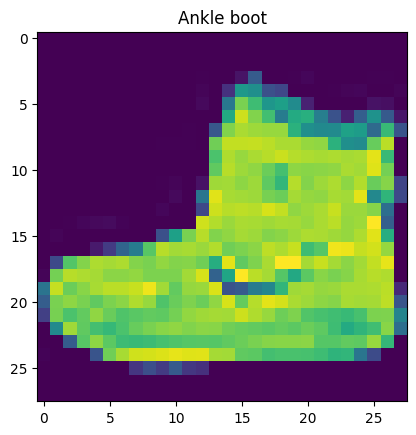

In [9]:
plt.imshow(image.squeeze())
plt.title(class_name[label])

Text(0.5, 1.0, '9')

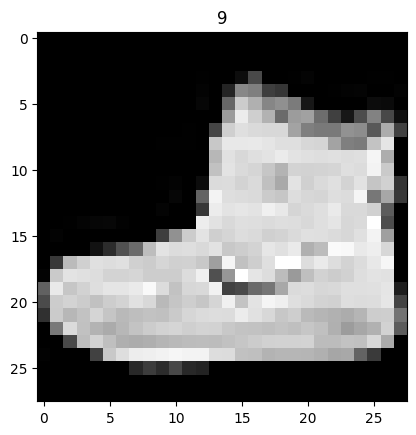

In [10]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(label)

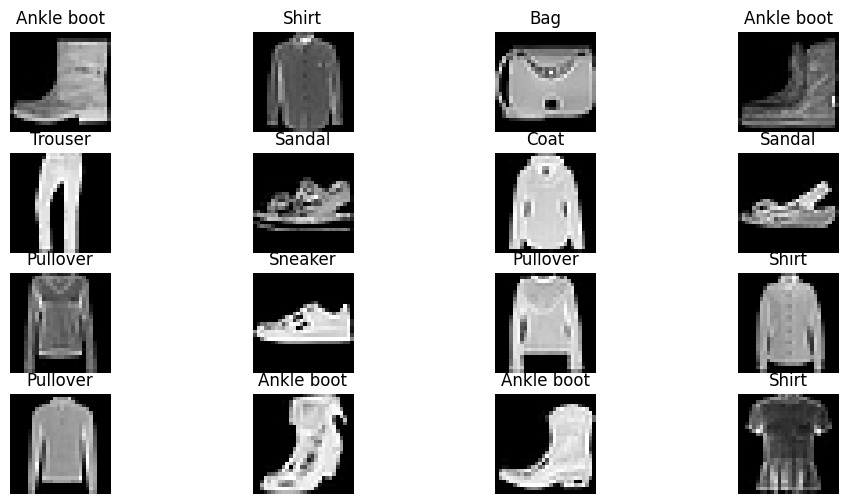

In [11]:
#plot more images 
torch.manual_seed(42)
fig =plt.figure(figsize=(12,6))
rows,cols=4,4
for i in range(1,rows*cols + 1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    img,label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap='gray')
    plt.title(class_name[label])
    plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines ? Or do you think we'll need non-linearity 

In [12]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader 

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into python iterable.

More specifically, we want to turn our data into batches (or mini batches).

Why would we do this ?

1. It is more computationally efficient, as in, your computing hardware may not be able to look(store in memory) at 6000 images in one hit. So we break it down to 32 images at a time (batch size of 32).

2. It gives our neural network more chances to update its gradient per epoch.


In [13]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter

BATCH_SIZE = 32 


# Turn dataset into iterable (batches)

train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader= DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

train_dataloader,test_dataloader



(<torch.utils.data.dataloader.DataLoader at 0x2e058d4b550>,
 <torch.utils.data.dataloader.DataLoader at 0x2e058d4b4f0>)

In [14]:
# Let's check out what we've created

print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader :{len(train_dataloader)} batches of { BATCH_SIZE}.....")
print(f"Length of test_dataloader: {len(test_dataloader)} bateches of {BATCH_SIZE}.... ")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x000002E058D4B550>, <torch.utils.data.dataloader.DataLoader object at 0x000002E058D4B4F0>)
Length of train_dataloader :1875 batches of 32.....
Length of test_dataloader: 313 bateches of 32.... 


In [15]:
# Check what's inside the train_dataloader 
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label 3, label size: torch.Size([])


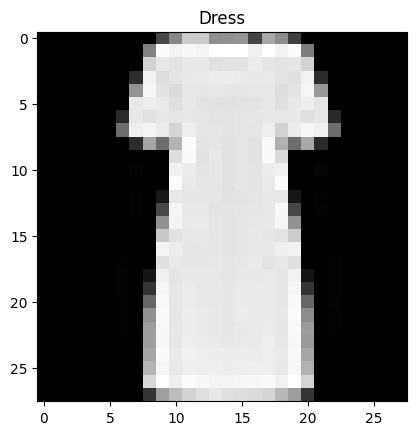

In [16]:
# Show a random batch

RANDOM_SEED=42
torch.manual_seed(RANDOM_SEED)

random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_name[label])
plt.axis=False
print(f"Image size: {img.shape}")
print(f"Label {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model 

When starting to build a series of machine learning modelling experiments, it's best practices to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsquent models/experiments
